In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [2]:
import pandas as pd

2. Read in the five csv files.

In [3]:
df_order = pd.read_csv("JD_order_data.csv")
df_user = pd.read_csv("JD_user_data.csv")
df_delivery = pd.read_csv("JD_delivery_data.csv")
df_inventory = pd.read_csv("JD_inventory_data.csv")
df_network = pd.read_csv("JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [4]:
print("Number of observations in 'Order data':", len(df_order), "\n")
print("Number of columns in 'Order data':", len(df_order.columns), "\n")
print("Column names in 'Order data' :", df_order.columns.tolist(), "\n\n\n\n")


print("Number of observations in 'User data':", len(df_user), "\n")
print("Number of columns in 'User data':", len(df_user.columns), "\n")
print("Column names in 'User data' :", df_user.columns.tolist(), "\n\n\n\n")


print("Number of observations in 'Delivery data':", len(df_delivery), "\n")
print("Number of columns in 'Delivery data':", len(df_delivery.columns), "\n")
print("Column names in 'Delivery data' :", df_delivery.columns.tolist(), "\n\n\n\n")


print("Number of observations in 'Inventory data':", len(df_inventory), "\n")
print("Number of columns in 'Inventory data':", len(df_inventory.columns), "\n")
print("Column names in 'Inventory data' :", df_inventory.columns.tolist(), "\n\n\n\n")


print("Number of observations in 'Network data':", len(df_network), "\n")
print("Number of columns in 'Network data':", len(df_network.columns), "\n")
print("Column names in 'Network data' :", df_network.columns.tolist(), "\n\n\n\n")

Number of observations in 'Order data': 549989 

Number of columns in 'Order data': 17 

Column names in 'Order data' : ['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des'] 




Number of observations in 'User data': 457298 

Number of columns in 'User data': 10 

Column names in 'User data' : ['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power'] 




Number of observations in 'Delivery data': 293229 

Number of columns in 'Delivery data': 6 

Column names in 'Delivery data' : ['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time', 'arr_time'] 




Number of observations in 'Inventory data': 136079 

Number of columns in 'Inventory data': 3 

Column names in 'Inven

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [5]:
missing_values_order= df_order.isna().sum()
print(missing_values_order)
var_missing_values_order = missing_values_order[missing_values_order > 0]
print(var_missing_values_order,"\n\n\n\n")



missing_values_user= df_user.isna().sum()
print(missing_values_user)
var_missing_values_user = missing_values_user[missing_values_user > 0]
print(var_missing_values_user,"\n\n\n\n")


missing_values_delivery= df_delivery.isna().sum()
print(missing_values_delivery)
var_missing_values_delivery = missing_values_delivery[missing_values_delivery > 0]
print(var_missing_values_delivery,"\n\n\n\n")


missing_values_inventory= df_inventory.isna().sum()
print(missing_values_inventory)
var_missing_values_inventory = missing_values_inventory[missing_values_inventory > 0]
print(var_missing_values_inventory,"\n\n\n\n")


missing_values_network= df_network.isna().sum()
print(missing_values_network)
var_missing_values_network= missing_values_network[missing_values_network > 0]
print(var_missing_values_network,"\n\n\n\n")

order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
Series([], dtype: int64) 




user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64
Series([], dtype: int64) 




package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time    0
arr_time            0
dtype: i

5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [6]:
unique_promise_values=df_order['promise'].unique()
unique_promise_values 

array(['-', '2', '1', '3', '4', '5', '6', '7', '8'], dtype=object)

6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [7]:
promise_value_counts = df_order['promise'].value_counts()
promise_value_counts

-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64

7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [8]:
selected_columns = df_order[['type', 'promise']]

# Sort by 'type' in descending order
sorted_data = selected_columns.sort_values(by='type', ascending=False)
first_10 = sorted_data.head(10)
last_10 = sorted_data.tail(10)
print("First 10 observations:")
print(first_10)
print("\nLast 10 observations:")
print(last_10)

First 10 observations:
        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -

Last 10 observations:
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [9]:
import pandas as pd

# Assuming you have DataFrames 'order' and 'delivery'
merged_data_inner = pd.merge(df_order, df_delivery, on='order_ID', how='inner')
print("Number of observations in 'Merged table':", len(merged_data_inner), "\n")
print("Number of observations in 'Order data':", len(df_order), "\n")
print("Number of observations in 'Delivery data':", len(df_delivery), "\n")

Number of observations in 'Merged table': 326862 

Number of observations in 'Order data': 549989 

Number of observations in 'Delivery data': 293229 



9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [10]:
merged_data_right = pd.merge(df_order, df_delivery, on='order_ID', how='right')
print("Number of observations in 'Merged table':", len(merged_data_right), "\n")
print(merged_data_right)
print(df_delivery)

Number of observations in 'Merged table': 326862 

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       dc3d6d2258  ee666e25c3  2e06817802  2018-03-01  2018-03-01 06:21:07.0   
1       19802a570c  845df5b5f2  5ae1bb1c76  2018-03-01  2018-03-01 09:10:09.0   
2       e22627af66  cae0d8c01f  b8c182c74f  2018-03-01  2018-03-01 10:50:41.0   
3       e22627af66  cae0d8c01f  c98d32ff09  2018-03-01  2018-03-01 10:50:41.0   
4       e22627af66  cae0d8c01f  c98d32ff09  2018-03-01  2018-03-01 10:50:41.0   
...            ...         ...         ...         ...                    ...   
326857  cb319102f1  df8c108eff  ac0cd64708  2018-03-31  2018-03-31 23:38:17.0   
326858  0fe3bbcfd8  b1fa95ae5e  068f4481b3  2018-03-22  2018-03-22 17:42:37.0   
326859  0fe3bbcfd8  b1fa95ae5e  fbce41fd82  2018-03-22  2018-03-22 17:42:37.0   
326860  0fe3bbcfd8  b1fa95ae5e  8dc4a01dec  2018-03-22  2018-03-22 17:42:37.0   
326861  d22fa05841  4032897ccb  50b53a8536  2018-03-24  20

10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [11]:
merged_data_left = pd.merge(df_order, df_delivery, on='order_ID', how='left')
print("Number of observations in 'Merged table':", len(merged_data_left), "\n")
print("Number of observations in 'Order table':", len(df_order), "\n")

Number of observations in 'Merged table': 550017 

Number of observations in 'Order table': 549989 



### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [12]:
merged_data_inner
merged_data_inner['type_x'] = merged_data_inner['type_y']
merged_data_inner

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,2,3,269.0,189.0,...,0.0,0.0,0,2,2,1b81523e8d,0,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,0.0,0.0,1,2,2,9fa0694b3b,1,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des,package_ID,type_y,ship_out_time,arr_station_time,arr_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,...,0.0,0.0,0,28,28,7444318d01,1,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,...,0.0,0.0,0,28,28,f973b01694,1,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,...,0.0,0.0,0,4,28,8c1cec8d4b,1,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,...,0.0,6.0,0,3,16,d43a33c38a,1,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15.0,1,1,1,79.9,38.9,...,0.0,0.0,0,3,16,e0f5386d87,1,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35.0,1,0,3,269.0,189.0,...,0.0,0.0,0,2,2,1b81523e8d,0,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43.0,1,1,2,0.0,-1.0,...,0.0,0.0,1,2,2,9fa0694b3b,1,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,...,0.0,0.0,0,59,2,c9d77a7ed0,1,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,...,0.0,0.0,0,2,2,b9ad79338f,1,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00


Then compare the values of the two variables are the same.

In [13]:
# Assuming your DataFrame is named 'merged_table'

# Check if values in 'type_x' are the same as values in 'type_y'
are_types_equal = (merged_data_inner['type_x'] == merged_data_inner['type_y']).all()

# Print the result
if are_types_equal:
    print("The values of 'type_x' and 'type_y' are the same.")
    print(are_types_equal)
else:
    print("The values of 'type_x' and 'type_y' are not the same.")
    print(are_types_equal)



The values of 'type_x' and 'type_y' are the same.
True


If they are, please drop one of them.

In [14]:
merged_data_inner.drop(columns=['type_y'], inplace=True)

12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [15]:
single_item_orders = merged_data_inner.duplicated(subset='order_ID', keep=False)
single_item_orders.value_counts()

False    265209
True      61653
dtype: int64

Then we filter the data to remove those orders of a single gift item. Save the changes.

In [16]:
#filtered_orders = merged_data_inner[~(single_item_orders & (merged_data_inner['gift_item'] == 1))]
#merged_data_inner = filtered_orders.copy()
#merged_data_inner["single_item_order"].value_counts()

13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [17]:
package_counts = merged_data_inner.groupby('order_ID')['package_ID'].nunique()

# Use transform() to broadcast the package counts to all records in the original DataFrame
merged_data_inner['num_packages'] = merged_data_inner['order_ID'].transform(lambda x: package_counts[x])

# Filter out orders with multiple packages
merged_data_inner_filtered = merged_data_inner[merged_data_inner['num_packages'] == 1]

# Drop the 'num_packages' column if you no longer need it
merged_data_inner_filtered = merged_data_inner_filtered.drop(columns=['num_packages'])

# Display or use the filtered DataFrame (df_filtered) as needed
print(merged_data_inner_filtered)

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326858  9fa0694b3b  39933e9bc6  767ac490ed  2018-03-31  2018-03-31 19:51:43.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [18]:
merged_data_inner['order_date'] = pd.to_datetime(merged_data_inner['order_date'])
merged_data_inner['order_time'] = pd.to_datetime(merged_data_inner['order_time'])
merged_data_inner['ship_out_time'] = pd.to_datetime(merged_data_inner['ship_out_time'])
merged_data_inner['arr_station_time'] = pd.to_datetime(merged_data_inner['arr_station_time'])
merged_data_inner['arr_time'] = pd.to_datetime(merged_data_inner['arr_time'])

In [19]:
merged_data_inner['order_day'] = merged_data_inner['order_date'].dt.day

In [20]:
merged_data_inner['order_hour'] = merged_data_inner['order_time'].dt.hour

In [21]:
merged_data_inner['delivery_time'] = merged_data_inner['arr_time'] - merged_data_inner['order_time']
merged_data_inner

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,dc_ori,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,num_packages,order_day,order_hour,delivery_time
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,28,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,1,11,1 days 02:49:20
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,28,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,1,9,1 days 03:46:34
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,4,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,1,21,2 days 13:30:10
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,3,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,1,19,0 days 15:46:23
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,3,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,1,21,0 days 14:50:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35,1,0,3,269.0,189.0,...,2,2,1b81523e8d,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00,1,31,12,2 days 00:17:25
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43,1,1,2,0.0,-1.0,...,2,2,9fa0694b3b,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00,1,31,19,0 days 14:08:17
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57,1,1,3,118.0,55.0,...,59,2,c9d77a7ed0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00,1,31,8,2 days 06:04:03
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01,1,1,2,78.0,78.0,...,2,2,b9ad79338f,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00,1,31,13,0 days 21:28:59


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [22]:
merged_data_inner['delivery_time_hours'] = merged_data_inner['delivery_time'].apply(lambda x: x.total_seconds() / 3600)
merged_data_inner

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type_x,promise,original_unit_price,final_unit_price,...,dc_des,package_ID,ship_out_time,arr_station_time,arr_time,num_packages,order_day,order_hour,delivery_time,delivery_time_hours
0,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40,1,1,2,99.9,53.9,...,28,7444318d01,2018-03-01 13:00:00,2018-03-02 08:00:00,2018-03-02 14:00:00,1,1,11,1 days 02:49:20,26.822222
1,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26,1,1,2,78.0,58.5,...,28,f973b01694,2018-03-01 14:00:00,2018-03-02 09:00:00,2018-03-02 13:00:00,1,1,9,1 days 03:46:34,27.776111
2,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50,1,1,2,61.0,35.0,...,28,8c1cec8d4b,2018-03-02 09:00:00,2018-03-03 08:00:00,2018-03-04 11:00:00,1,1,21,2 days 13:30:10,61.502778
3,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37,1,1,1,78.0,53.0,...,16,d43a33c38a,2018-03-01 20:00:00,2018-03-02 07:00:00,2018-03-02 11:00:00,1,1,19,0 days 15:46:23,15.773056
4,e0f5386d87,0b07cae293,589c2b865b,2018-03-01,2018-03-01 21:09:15,1,1,1,79.9,38.9,...,16,e0f5386d87,2018-03-01 22:00:00,2018-03-02 09:00:00,2018-03-02 12:00:00,1,1,21,0 days 14:50:45,14.845833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326857,5fd298d448,165ee3e319,f7280c119d,2018-03-31,2018-03-31 12:42:35,1,0,3,269.0,189.0,...,2,1b81523e8d,2018-03-31 13:00:00,2018-04-02 07:00:00,2018-04-02 13:00:00,1,31,12,2 days 00:17:25,48.290278
326858,9fa0694b3b,39933e9bc6,767ac490ed,2018-03-31,2018-03-31 19:51:43,1,1,2,0.0,-1.0,...,2,9fa0694b3b,2018-03-31 21:00:00,2018-04-01 07:00:00,2018-04-01 10:00:00,1,31,19,0 days 14:08:17,14.138056
326859,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57,1,1,3,118.0,55.0,...,2,c9d77a7ed0,2018-03-31 11:00:00,2018-04-02 07:00:00,2018-04-02 15:00:00,1,31,8,2 days 06:04:03,54.067500
326860,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01,1,1,2,78.0,78.0,...,2,b9ad79338f,2018-03-31 14:00:00,2018-04-01 07:00:00,2018-04-01 11:00:00,1,31,13,0 days 21:28:59,21.483056


16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [23]:
center_traffic = merged_data_inner.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()
center_traffic_sorted = center_traffic.sort_values(by='package_ID', ascending=False)
center_traffic_sorted

,dc_ori,dc_des,package_ID
31,5,5,31744
6,2,2,23480
71,9,9,23110
23,4,4,20470
120,24,24,12666
...,...,...,...
326,56,18,1
379,57,19,1
322,56,14,1
4,1,46,1


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [24]:
gift_item_orders = df_order[df_order['gift_item'] == 1]
print(gift_item_orders['original_unit_price'].value_counts())
print(gift_item_orders['final_unit_price'].value_counts())

0.0     94600
69.0        5
65.0        1
Name: original_unit_price, dtype: int64
 0.000000     86069
-1.000000      2158
-3.000000      1070
-0.500000      1015
-2.000000       910
              ...  
-3.625000         1
-19.200000        1
-0.428571         1
-5.300000         1
-3.150000         1
Name: final_unit_price, Length: 138, dtype: int64


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [25]:
df_order[(df_order['sku_ID'] == 'a0e49f9966') & (df_order['order_date'] == '2018-03-15')]

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des


In [26]:
df_order['order_date'] = pd.to_datetime(df_order['order_date'])

# Filter orders for the specified product on '2018-3-15'
product_orders = df_order[(df_order['sku_ID'] == 'a0e49f9966') & (df_order['order_date'] == '2018-03-15')]

# Calculate sales by multiplying quantity and final_price columns
sales_series = product_orders['quantity'] * product_orders['final_unit_price']

# Display the sales series
print("Sales Series:")
print(sales_series)

# Calculate the total sales by summing the series
total_sales = sales_series.sum()

# Display the total sales
print("\nTotal Sales:", total_sales)

Sales Series:
Series([], dtype: float64)

Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [27]:
pivot_table_counts = pd.pivot_table(df_user, values='user_ID', index='user_level', columns='education', aggfunc='count', fill_value=0)
print("Pivot Table - Customer Counts:")
print(pivot_table_counts)

Pivot Table - Customer Counts:
education      -1     1      2      3      4
user_level                                  
-1           2294     0      0      9      0
 0            145     0      7      8      1
 1          66391  3001  24182  35486    369
 2          28310  3270  32953  75907   1419
 3           8201  1260  13418  68944   4979
 4           4023   629   3606  37548  39922
 10          1005     0      2      6      3


20. Answer one of your descriptive questions using groupby or pivot table.

In [28]:
#What otal Quantity Sold per Product
quantity_per_product = df_order.groupby('sku_ID')['quantity'].sum().reset_index()

# Display the result
print("Total Quantity Sold per Product:")
print(quantity_per_product)

Total Quantity Sold per Product:
          sku_ID  quantity
0     000aa92b82        14
1     000d4af39d         1
2     000dc27e13         1
3     000e84e3a7         1
4     00104dbcd7        89
...          ...       ...
9154  fff33f1633         3
9155  fff4328ec0         1
9156  fff84ed7ec        16
9157  fffe1bd280       588
9158  fffe6eb4df         8

[9159 rows x 2 columns]


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [29]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [30]:
df_user['user_level'] = df_user['user_level'].astype('string')

# Change data types of other variables
df_user['education'] = df_user['education'].astype('string')
df_user['city_level'] = df_user['city_level'].astype('string')
df_user['purchase_power'] = df_user['purchase_power'].astype('string')
print(df_user['education'])

0          3
1         -1
2          3
3          3
4         -1
          ..
457293    -1
457294     3
457295     2
457296    -1
457297    -1
Name: education, Length: 457298, dtype: string


22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [31]:
# Assuming you have a variable user_level that holds the user's level
user_level = '-1'

if user_level == '-1':
    user_level = 'New'

elif user_level == '10':
    user_level = 'Bus'

print("Updated user level:", user_level)


Updated user level: New


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [32]:
# Assuming you have variables for education, city_level, and purchase_power
education = -1
city_level = -1
purchase_power = -1

# Replace -1 with 'U' for missing values
if education == -1:
    education = 'U'

if city_level == -1:
    city_level = 'U'

if purchase_power == -1:
    purchase_power = 'U'

# Print the updated values
print("Updated education:", education)
print("Updated city_level:", city_level)
print("Updated purchase_power:", purchase_power)


Updated education: U
Updated city_level: U
Updated purchase_power: U


In [33]:
# Replace -1 with 'U' in specific columns
columns_to_replace = ['education', 'city_level', 'purchase_power']
df_user[columns_to_replace] = df_user[columns_to_replace].replace(-1, 'U')


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of user_level')

Text(0.5, 0, 'user_level')

Text(0, 0.5, 'Count')

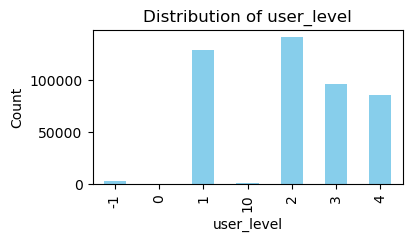

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of plus')

Text(0.5, 0, 'plus')

Text(0, 0.5, 'Count')

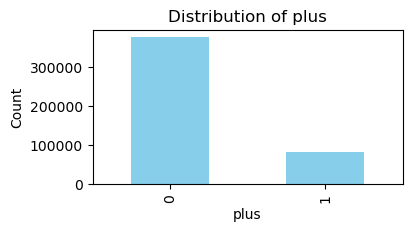

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of gender')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Count')

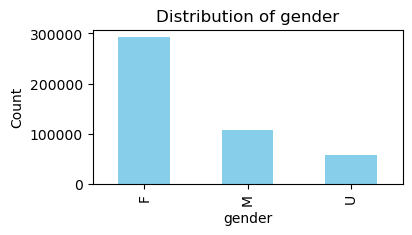

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of age')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Count')

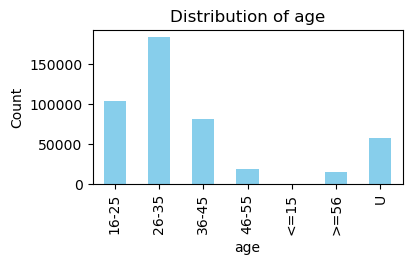

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of marital_status')

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Count')

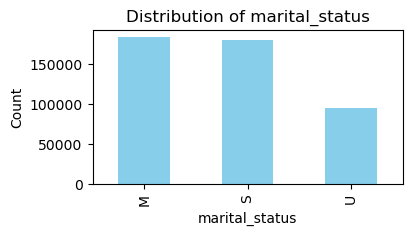

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of education')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Count')

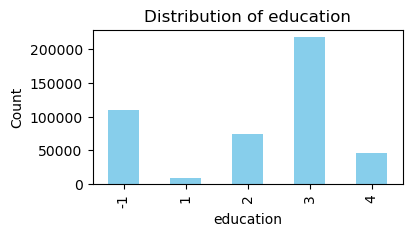

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of city_level')

Text(0.5, 0, 'city_level')

Text(0, 0.5, 'Count')

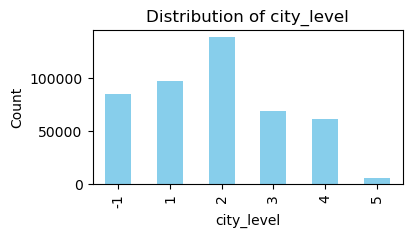

<Figure size 400x200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Distribution of purchase_power')

Text(0.5, 0, 'purchase_power')

Text(0, 0.5, 'Count')

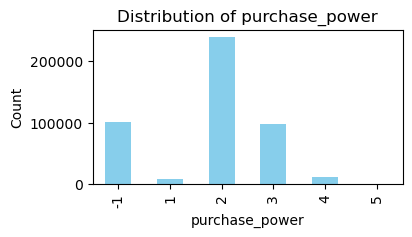

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample user DataFrame (replace this with your actual DataFrame)
user_data = {
    'user_level': ['A', 'B', 'C', 'A', 'B'],
    'plus': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [25, 30, 22, 35, 28],
    'marital_status': ['Single', 'Married', 'Single', 'Married', 'Single'],
    'education': ['Bachelor', 'Master', 'High School', 'Bachelor', 'Doctorate'],
    'city_level': ['Urban', 'Suburban', 'Rural', 'Urban', 'Suburban'],
    'purchase_power': ['High', 'Medium', 'Low', 'High', 'Medium']
}

user_df = pd.DataFrame(user_data)

# Bar graphs for each categorical variable
categories = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

for category in categories:
    plt.figure(figsize=(4, 2))
    df_user[category].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.show()


25. Next we move to the table that resulted from Q10-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Quantity Sold by Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total Quantity Sold')

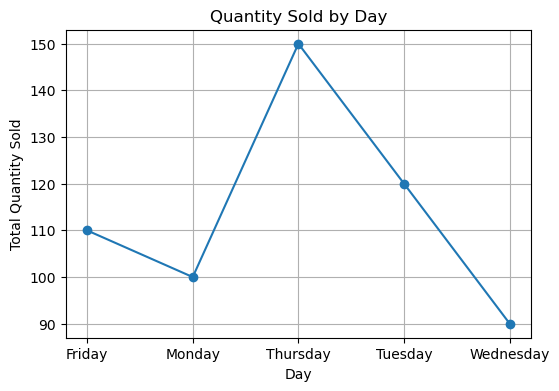

The day with the most quantity sold is Thursday with a total of 150 units.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample result DataFrame (replace this with your actual DataFrame)
result_data = {
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'quantity': [100, 120, 90, 150, 110]
}

result_df = pd.DataFrame(result_data)

# Sum the quantity by day
daily_sum = result_df.groupby('day')['quantity'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, marker='o', linestyle='-')
plt.title('Quantity Sold by Day')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

# Find the day with the most quantity sold
max_day = daily_sum.idxmax()
max_quantity = daily_sum.max()

print(f"The day with the most quantity sold is {max_day} with a total of {max_quantity} units.")


26. Repeat Q25 for variable 'hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Customer Order Trend Over a Day')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Total Quantity Sold')

([<matplotlib.axis.XTick at 0x12c1f3614d0>,
 [Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22')])

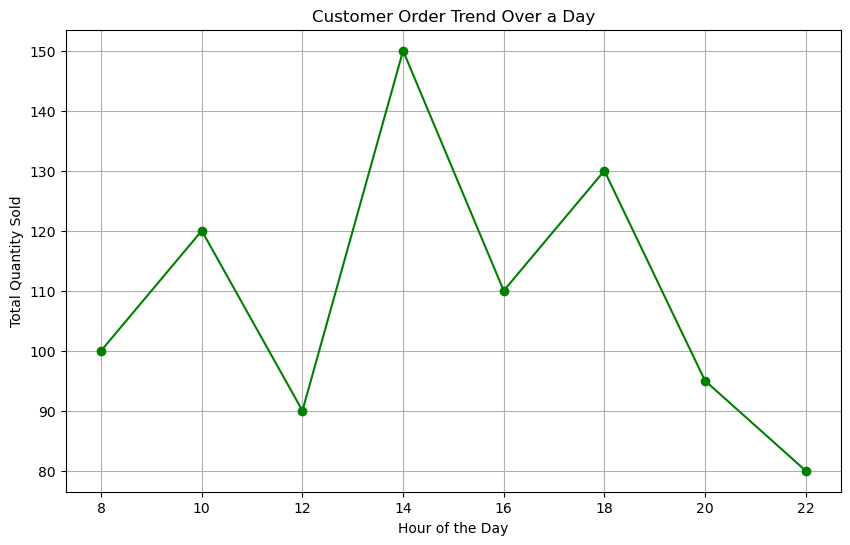

The peak time for orders during a day is at 14:00 with a total of 150 units.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample result DataFrame (replace this with your actual DataFrame)
result_data = {
    'hour': [8, 10, 12, 14, 16, 18, 20, 22],
    'quantity': [100, 120, 90, 150, 110, 130, 95, 80]
}

result_df = pd.DataFrame(result_data)

# Sum the quantity by hour
hourly_sum = result_df.groupby('hour')['quantity'].sum()

# Create a line graph for the customer order trend over a day's time
plt.figure(figsize=(10, 6))
plt.plot(hourly_sum.index, hourly_sum.values, marker='o', linestyle='-', color='green')
plt.title('Customer Order Trend Over a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(hourly_sum.index)
plt.grid(True)
plt.show()

# Find the peak time for orders during a day
peak_hour = hourly_sum.idxmax()
peak_quantity = hourly_sum.max()

print(f"The peak time for orders during a day is at {peak_hour}:00 with a total of {peak_quantity} units.")


27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [37]:
original_unit_price_stats = df_order['original_unit_price'].describe()

# Extract min, max, and median
min_price = original_unit_price_stats['min']
max_price = original_unit_price_stats['max']
median_price = original_unit_price_stats['50%'] 

print(f"Minimum original unit price: {min_price}")
print(f"Maximum original unit price: {max_price}")
print(f"Median original unit price: {median_price}")


Minimum original unit price: 0.0
Maximum original unit price: 12158.0
Median original unit price: 79.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [38]:
price_gt_350 = df_order['original_unit_price'] > 350
percentage_gt_350 = (price_gt_350.sum() / len(df_order)) * 100
print(f"Percentage of units greater than 350 unit price: {percentage_gt_350}%")
order_data_filtered = df_order.loc[df_order['original_unit_price'] <= 350]
order_data_filtered

Percentage of units greater than 350 unit price: 0.7474694948444424%


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549984,3ad06b9fbe,a27b3ed4d4,a9109972d1,2018-03-31,2018-03-31 01:22:47.0,1,2,-,0.0,-1.0,0.0,0.0,0.0,1.0,1,2,2
549985,c9d77a7ed0,18f92434cd,7f53769d3f,2018-03-31,2018-03-31 08:55:57.0,1,1,3,118.0,55.0,63.0,0.0,0.0,0.0,0,59,2
549986,b9ad79338f,b5caf8a580,8dc4a01dec,2018-03-31,2018-03-31 13:31:01.0,1,1,2,78.0,78.0,0.0,0.0,0.0,0.0,0,2,2
549987,be3a9414b1,20ba6655f3,2dd6b818ec,2018-03-31,2018-03-31 12:51:18.0,1,2,-,189.0,78.0,111.0,0.0,0.0,0.0,0,4,28


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

(array([94988.,  5139.,  3643.,  9405., 12372., 42122., 52694., 74908.,
        31649., 27685., 11848., 13242., 18957., 22047., 14749., 10859.,
         6509., 13044.,  8028.,  9983.,  4189.,  1956.,   951.,  4021.,
         7876.,  3596.,  2531.,   690.,   903., 28928.,  1502.,   178.,
          873.,  3696.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340.]),
 <BarContainer object of 34 artists>)

Text(0.5, 1.0, 'Original Unit Price Distribution')

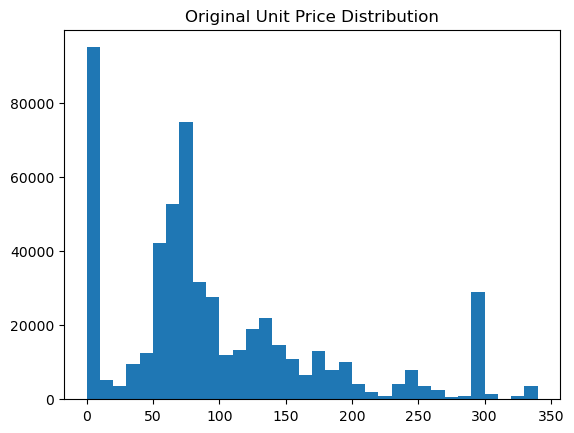

In [39]:
# Graph for Original Unit Price Distribution
plt.hist(order_data_filtered['original_unit_price'], bins=range(0, 350, 10))
plt.title('Original Unit Price Distribution')
plt.show()


28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

(array([2.4000e+01, 1.0000e+00, 1.7200e+02, 8.3400e+03, 9.2272e+04,
        1.0100e+04, 1.6074e+04, 5.7240e+04, 5.6285e+04, 6.3391e+04,
        5.4551e+04, 3.2208e+04, 1.7110e+04, 1.8179e+04, 1.4814e+04,
        7.8970e+03, 1.4049e+04, 7.6800e+03, 1.2938e+04, 7.5770e+03,
        1.0248e+04, 2.6340e+03, 4.1050e+03, 4.4710e+03, 1.2051e+04,
        3.9150e+03, 8.7500e+03, 2.8630e+03, 2.8880e+03, 9.3500e+02,
        4.3700e+02, 4.0200e+02, 3.7000e+02, 4.6500e+02, 1.8000e+02,
        8.1000e+01, 7.1000e+01, 7.5000e+01, 3.5000e+01]),
 array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,
         70.,  80.,  90., 100., 110., 120., 130., 140., 150., 160., 170.,
        180., 190., 200., 210., 220., 230., 240., 250., 260., 270., 280.,
        290., 300., 310., 320., 330., 340., 350.]),
 <BarContainer object of 39 artists>)

Text(0.5, 1.0, 'Final Unit Price Distribution')

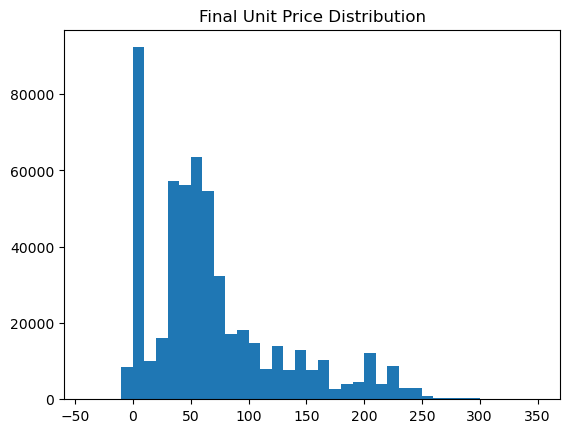

In [40]:
# Graph for Final Unit Price Distribution
plt.hist(order_data_filtered['final_unit_price'], bins=range(-40, 360, 10))
plt.title('Final Unit Price Distribution')
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

In [41]:
#quantity_per_day = order_data_filtered.groupby(order_data_filtered['day'])['quantity'].sum()
#sales = quantity_per_day * order_data_filtered['final_unit_price']
#plt.plot(sales.index, sales.values)
#plt.title('Filtered Table Daily Sales')
#plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

In [42]:
#1.What is the average coupon discount per order? the given product category?
avg_discount_by_category = df_order.groupby('type')['coupon_discount_per_unit'].mean()
print(avg_discount_by_category)

type
1    2.321762
2    3.532353
Name: coupon_discount_per_unit, dtype: float64



# Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [43]:
merged_de_inner = pd.merge(df_order, df_delivery, on='order_ID', how='inner')

In [44]:
# Original value of items
merged_data_inner['originValue'] = merged_data_inner['original_unit_price'] \
                                        * merged_data_inner['quantity']

# Final value of items                                    
merged_data_inner['finalValue'] = merged_data_inner['final_unit_price'] \
                                    * merged_data_inner['quantity']                                   

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [45]:
agg_dict = {
    'user_ID': 'first',
    'type_x': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = merged_data_inner.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [46]:
order_user = pd.merge(order_agg, df_user, on = 'user_ID', how = 'inner')

33. We need to code a few more variables.

In [47]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [48]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [49]:
order_user['delivery_time'] = pd.to_timedelta(order_user['delivery_time'])

# Convert timedelta to hours
order_user['delivery_duration_hours'] = order_user['delivery_time'] / pd.Timedelta(hours=1)

# Display the delivery duration in hours
print(order_user['delivery_duration_hours'])
X = order_user[["type_x","sku_ID","quantity","finalValue","gift_item","plus","dis_rate","busy_hour"]]
y = order_user["delivery_duration_hours"]

0         22.807222
1         53.321667
2         22.490278
3          8.061944
4         21.618333
            ...    
293198    47.689722
293199    14.148056
293200    22.313333
293201    87.863611
293202    40.359722
Name: delivery_duration_hours, Length: 280155, dtype: float64


35. Prepare the training and test datasets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

36. Train a Decision Tree regression model.

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

37. Make predictions on the testing data.

In [52]:
predictions = regressor.predict(X_test)
predictions

array([67.97847222, 21.47609477, 65.32104971, ..., 25.80830247,
       32.83694444, 25.73700617])

38. Evaluate the model using RMSE

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse_test = mean_squared_error(y_test, predictions)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error on Testing Data: {rmse_test:.2f}")

Root Mean Squared Error on Testing Data: 27.00


In [54]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

count                       280155
mean     1 days 09:41:04.107469079
std      1 days 04:22:30.757980040
min              -1 days +07:25:00
25%                0 days 17:21:10
50%                0 days 23:33:42
75%                1 days 19:01:48
max               26 days 17:13:03
Name: delivery_time, dtype: object